In [5]:
import keras
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from keras.models import Sequential 
from keras.layers import Dense 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from keras.callbacks import EarlyStopping

In [8]:
df=pd.read_csv('creditcard.csv')
df.drop(columns=['Time'],inplace=True)  # drop the first column-"time"

In [9]:
X=df.iloc[:,:-1].values  
y=df.iloc[:,-1].values
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3)
smote=SMOTE()
X_smote, y_smote=smote.fit_sample(X_train, y_train)

In [35]:
# set up the neural network 
Model=Sequential()
Model.add(Dense(units=16, input_dim=29,activation='relu'))
Model.add(Dense(units=24, activation='relu'))
Model.add(Dense(units=1, activation='sigmoid'))

In [36]:
# compile the ANN
Model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [41]:
es=EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)

In [42]:
history=Model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=100,verbose=0, callbacks=[es])


Epoch 00081: early stopping


Train: 1.000, Test: 0.999


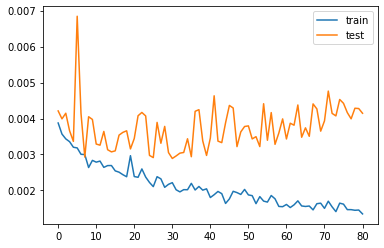

In [43]:
# evaluate the model
_, train_acc = Model.evaluate(X_train, y_train, verbose=0)
_, test_acc = Model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [45]:
# predict the test data
y_NN=Model.predict(X_test)
print(classification_report(y_test,y_NN.round()), confusion_matrix(y_test,y_NN.round()))



              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85297
           1       0.83      0.82      0.83       146

    accuracy                           1.00     85443
   macro avg       0.92      0.91      0.91     85443
weighted avg       1.00      1.00      1.00     85443
 [[85273    24]
 [   26   120]]


Epoch 00061: early stopping
Train: 1.000, Test: 0.998


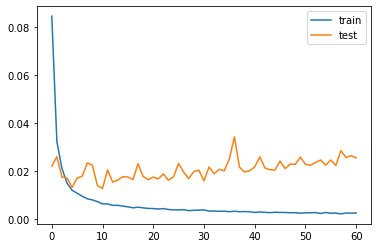

In [49]:
## using SMOTE Sampling for training modeling
Model=Sequential()
Model.add(Dense(units=16, input_dim=29,activation='relu'))
Model.add(Dense(units=24, activation='relu'))
Model.add(Dense(units=1, activation='sigmoid'))
Model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history=Model.fit(X_smote, y_smote, validation_data=(X_test,y_test), epochs=100,verbose=0, callbacks=[es])
# evaluate the model
_, train_acc = Model.evaluate(X_smote, y_smote, verbose=0)
_, test_acc=Model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()


In [50]:
# predict the test data using SMOTE Sampling training model
y_NN=Model.predict(X_test)
print(classification_report(y_test,y_NN.round()), confusion_matrix(y_test,y_NN.round()))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85297
           1       0.52      0.86      0.65       146

    accuracy                           1.00     85443
   macro avg       0.76      0.93      0.82     85443
weighted avg       1.00      1.00      1.00     85443
 [[85182   115]
 [   21   125]]


#### Summary: although the recall score has increased with the class 1 with the over-sampling training model,  the precision score and f1 score have significently decreased. In neural network, the better balanced recall score and f1 score can be achived without over sampling (SMOTE) 